In [93]:
%matplotlib inline
import pylab as pl

In [94]:
import pyspeckit

In [95]:
source_size =  4.3350376922e+00
tkin = 7.9842254347e+01
Ntot = 1.0061155735e+16
vwidth_fwhm = 4.2101396644e+00
vwidth = vwidth_fwhm / np.sqrt(8*np.log(2))
vcen = -7.9000000000e+00

In [96]:
# define path and name of molfit file
#DEFAULT MolfitsFileName = LocalPath + "files/my_molecules.molfit"
MolfitsFileName = LocalPath + 'CH3CN_pure.molfit'

def set_xclass_parameters(source_size=source_size, tkin=tkin, Ntot=Ntot, vwidth_fwhm=vwidth_fwhm, vcen=vcen, filename=MolfitsFileName):
    with open(filename, "w") as fh:
        fh.write(f"""
%============================================================================================================================
%
% define molecules and their components:
%
%============================================================================================================================
%    source size:                 T_kin:               N_tot:            V_width:                V_off:   CFFlag:    keyword:
%       [arcsec]:                   [K]:              [cm-2]:            [km /s]:              [km /s]:       []:         []:
CH3CN;v=0;           1
 {source_size}       {tkin}     {Ntot}     {vwidth_fwhm}    {vcen}         c
""")

In [97]:
import sys
import os

LocalPath = os.getcwd() + "/"

# get path of XCLASS directory
XCLASSRootDir = str(os.environ.get('XCLASSRootDir', '')).strip()
XCLASSRootDir = os.path.normpath(XCLASSRootDir) + "/"

# extend sys.path variable
NewPath = XCLASSRootDir + "build_tasks/"
if (not NewPath in sys.path):
    sys.path.append(NewPath)

import task_myXCLASS

# define min. freq. (in MHz)
FreqMin = 220000.0

# define max. freq. (in MHz)
FreqMax = 220800.0

# define freq. step (in MHz)
FreqStep = 0.1

# depending on parameter "Inter_Flag" define beam size (in arcsec)
# (Inter_Flag = True) or size of telescope (in m) (Inter_Flag = False)
TelescopeSize = 1000.0 # meters

# define beam minor axis length (in arsec)
BMIN = None

# define beam major axis length (in arsec)
BMAJ = None

# define beam position angle (in degree)
BPA = None

# interferrometric data?
Inter_Flag = False

# define red shift
Redshift = None

# BACKGROUND: describe continuum with tBack and tslope only
t_back_flag = True

# BACKGROUND: define background temperature (in K)
tBack = 0.0

# BACKGROUND: define temperature slope (dimensionless)
tslope = 0.0

# BACKGROUND: define path and name of ASCII file describing continuum as function
#             of frequency
BackgroundFileName = ""

# DUST: define hydrogen column density (in cm^(-2))
N_H = 1.e22

# DUST: define spectral index for dust (dimensionless)
beta_dust = 0.0

# DUST: define kappa at 1.3 mm (cm^(2) g^(-1))
kappa_1300 = 0.0

# DUST: define path and name of ASCII file describing dust opacity as
#       function of frequency
DustFileName = ""

# FREE-FREE: define electronic temperature (in K)
Te_ff = None

# FREE-FREE: define emission measure (in pc cm^(-6))
EM_ff = None

# SYNCHROTRON: define kappa of energy spectrum of electrons (electrons m^(−3) GeV^(-1))
kappa_sync = None

# SYNCHROTRON: define magnetic field (in Gauss)
B_sync = None

# SYNCHROTRON: energy spectral index (dimensionless)
p_sync = None

# SYNCHROTRON: thickness of slab (in AU)
l_sync = None

# PHEN-CONT: define phenomenological function which is used to describe
#            the continuum
ContPhenFuncID = None

# PHEN-CONT: define first parameter for phenomenological function
ContPhenFuncParam1 = None

# PHEN-CONT: define second parameter for phenomenological function
ContPhenFuncParam2 = None

# PHEN-CONT: define third parameter for phenomenological function
ContPhenFuncParam3 = None

# PHEN-CONT: define fourth parameter for phenomenological function
ContPhenFuncParam4 = None

# PHEN-CONT: define fifth parameter for phenomenological function
ContPhenFuncParam5 = None

# use iso ratio file?
iso_flag = True

# define path and name of iso ratio file
#DEFAULT IsoTableFileName = LocalPath + "files/my_isonames.txt"
IsoTableFileName = LocalPath + "my_isonames.txt"

# define path and name of file describing Non-LTE parameters
CollisionFileName = ""

# define number of pixels in x-direction (used for sub-beam description)
NumModelPixelXX = 100

# define number of pixels in y-direction (used for sub-beam description)
NumModelPixelYY = 100

# take local-overlap into account or not
LocalOverlapFlag = False

# disable sub-beam description
NoSubBeamFlag = True

# define path and name of database file
dbFilename = ""

# define rest freq. (in MHz)
RestFreq = 0.0

# define v_lsr (in km/s)
vLSR = 0.0

In [98]:
import io
from contextlib import redirect_stdout

def myxclass_call(FreqMin=1e3, FreqMax=1e4, verbose=False):
    ## call myXCLASS function
    with io.StringIO() as buf, redirect_stdout(buf):
        modeldata, log, TransEnergies, IntOpt, JobDir = task_myXCLASS.myXCLASS(
                                                    FreqMin, FreqMax, FreqStep,
                                                    TelescopeSize, BMIN, BMAJ,
                                                    BPA, Inter_Flag, Redshift,
                                                    t_back_flag, tBack, tslope,
                                                    BackgroundFileName,
                                                    N_H, beta_dust, kappa_1300,
                                                    DustFileName, Te_ff, EM_ff,
                                                    kappa_sync, B_sync, p_sync,
                                                    l_sync, ContPhenFuncID,
                                                    ContPhenFuncParam1,
                                                    ContPhenFuncParam2,
                                                    ContPhenFuncParam3,
                                                    ContPhenFuncParam4,
                                                    ContPhenFuncParam5,
                                                    MolfitsFileName, iso_flag,
                                                    IsoTableFileName,
                                                    CollisionFileName,
                                                    NumModelPixelXX,
                                                    NumModelPixelYY,
                                                    LocalOverlapFlag,
                                                    NoSubBeamFlag,
                                                    dbFilename,
                                                    RestFreq, vLSR)
        output = buf.getvalue()
    if verbose:
        print(output)
        
    return modeldata, log, TransEnergies, IntOpt, JobDir

In [99]:
set_xclass_parameters()
modeldata, log, TransEnergies, IntOpt, JobDir = myxclass_call(FreqMin=FreqMin, FreqMax=FreqMax)

In [100]:
from astropy import units as u, constants

In [101]:
xaxis, yaxis = modeldata.T
xclass_spectrum = pyspeckit.Spectrum(xarr=xaxis*u.MHz, data=yaxis*u.K)

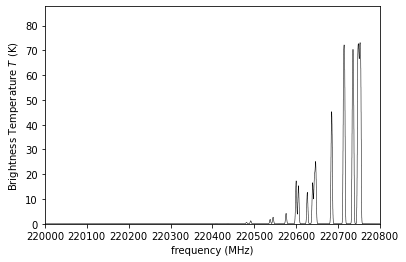

In [102]:
xclass_spectrum.plotter()

In [103]:
from pyspeckit.spectrum.models import lte_molecule
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters, get_molecular_parameters, generate_model, generate_fitter

In [104]:
ch3_13cn_to_ch3cn = 1./16.

In [105]:
Cfreqs, Caij, Cdeg, CEU, Cpartfunc = get_molecular_parameters('CH3CN, v=0',
                                                         catalog='CDMS',
                                                         fmin=FreqMin*u.MHz,
                                                         fmax=FreqMax*u.MHz)
def modfunc_12c_CDMS(xarr, vcen, width, tex, column, **kwargs):
    model = generate_model(xarr, vcen, width, tex, 
                   column=column, freqs=Cfreqs, aij=Caij, deg=Cdeg, EU=CEU, partfunc=Cpartfunc)
    return model

In [106]:
freqs, aij, deg, EU, partfunc = get_molecular_parameters('CH3CN',
                                                         catalog='JPL',
                                                         fmin=FreqMin*u.MHz,
                                                         fmax=FreqMax*u.MHz)
freqs13, aij13, deg13, EU13, partfunc13 = lte_molecule.get_molecular_parameters('CH3C-13-N',
                                                                                catalog='JPL',
                                                         fmin=FreqMin*u.MHz,
                                                         fmax=FreqMax*u.MHz)
def modfunc_12c(xarr, vcen, width, tex, column, **kwargs):
    model = generate_model(xarr, vcen, width, tex, 
                   column=column, freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc)
    return model

def modfunc_13c(xarr, vcen, width, tex, column, **kwargs):
    model = generate_model(xarr, vcen, width, tex, 
                   column=column*ch3_13cn_to_ch3cn, freqs=freqs13, aij=aij13, deg=deg13, EU=EU13, partfunc=partfunc13)
    return model


def modfunc(xarr, vcen, width, tex, column, **kwargs):
    join = np.concatenate
    model = generate_model(xarr, vcen, width, tex, 
                   column=join([np.ones_like(deg)*column, np.ones_like(deg13)*column*ch3_13cn_to_ch3cn]),
                   freqs=join([freqs, freqs13]),
                   aij=join([aij, aij13]),
                   deg=join([deg, deg13]),
                   EU=join([EU, EU13]),
                   partfunc=join([np.ones_like(deg)*partfunc(tex), np.ones_like(deg13)*partfunc13(tex)])
                  )
    return model
    
fitter = generate_fitter(modfunc, name="CH3CN")

In [107]:
model12cdms = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc_12c_CDMS(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot, ))

model12 = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc_12c(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot, ))
model13 = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc_13c(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot, ))
model = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot, ))

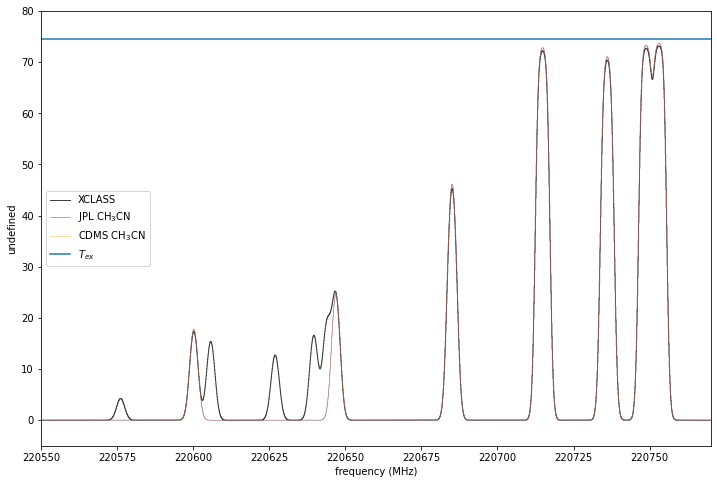

In [108]:
fig = pl.figure(figsize=(12,8))
xclass_spectrum.plotter(alpha=0.75, figure=fig, label='XCLASS', linewidth=1, zorder=-5)
ax = xclass_spectrum.plotter.axis
#model.plotter(clear=False, color='r', axis=ax, alpha=0.75, label='JPL')
model12.plotter(clear=False, color='b', axis=ax, alpha=0.75, label='JPL CH$_3$CN')
#model13.plotter(clear=False, color='g', axis=ax, alpha=0.75, label='JPL CH$_3$$^{13}$CN')
model12cdms.plotter(clear=False, color='orange', axis=ax, alpha=0.75, label='CDMS CH$_3$CN')

ax.axhline(lte_molecule.Jnu_cgs(220.65e9, tkin) - lte_molecule.Jnu_cgs(220.65e9, 2.73), label='$T_{ex}$')
ax.set_xlim(220550, 220770)
ax.set_ylim(-5, 80)
pl.legend(loc='best')

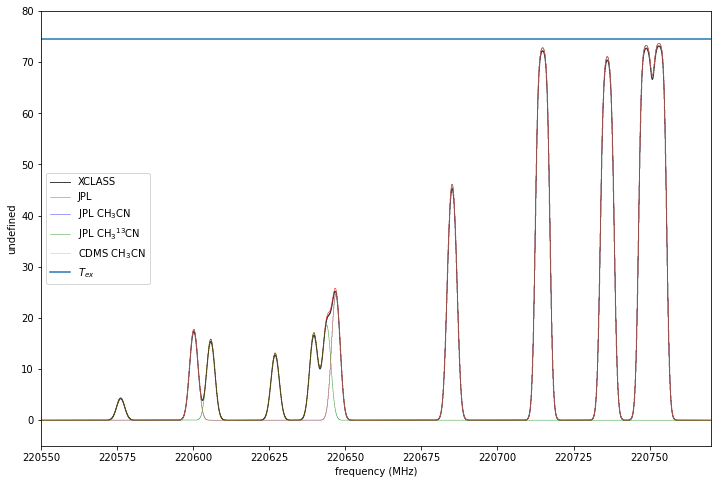

In [109]:
fig = pl.figure(figsize=(12,8))
xclass_spectrum.plotter(alpha=0.75, figure=fig, label='XCLASS', linewidth=1, zorder=-5)
ax = xclass_spectrum.plotter.axis
model.plotter(clear=False, color='r', axis=ax, alpha=0.75, label='JPL')
model12.plotter(clear=False, color='b', axis=ax, alpha=0.75, label='JPL CH$_3$CN')
model13.plotter(clear=False, color='g', axis=ax, alpha=0.75, label='JPL CH$_3$$^{13}$CN')
model12cdms.plotter(clear=False, color='orange', axis=ax, alpha=0.75, label='CDMS CH$_3$CN')

ax.axhline(lte_molecule.Jnu_cgs(220.65e9, tkin) - lte_molecule.Jnu_cgs(220.65e9, 2.73), label='$T_{ex}$')
ax.set_xlim(220550, 220770)
ax.set_ylim(-5, 80)
pl.legend(loc='best')

In [110]:
temperatures = [10, 50, 100, 300]
columns = [1e14, 1e15, 1e16, 1e17]

temcol_results = {}
for tem in temperatures:
    temcol_results[tem] = {}
    for col in columns:
        print(col, tem)
        set_xclass_parameters(tkin=tem, Ntot=col)
        modeldata, log, TransEnergies, IntOpt, JobDir = myxclass_call(FreqMin=FreqMin, FreqMax=FreqMax)
        JM_ = modfunc(modeldata.T[0]*u.MHz, vcen, width=vwidth, tex=tem, column=col)
        model_JPL_ = pyspeckit.Spectrum(xarr=modeldata.T[0]*u.MHz, data=JM_*u.K, header={})
        temcol_results[tem][col] = {'xclass':
                               {'modeldata':modeldata, 'log':log, 'TransEnergies':TransEnergies, 'IntOpt':IntOpt, 'JobDir':JobDir, 
                                'sp': pyspeckit.Spectrum(data=modeldata.T[1]*u.K, xarr=modeldata.T[0]*u.MHz, header={})},
                               'jpl': model_JPL_}

100000000000000.0 10
1000000000000000.0 10
1e+16 10
1e+17 10
100000000000000.0 50
1000000000000000.0 50
1e+16 50
1e+17 50
100000000000000.0 100
1000000000000000.0 100
1e+16 100
1e+17 100
100000000000000.0 300
1000000000000000.0 300
1e+16 300
1e+17 300


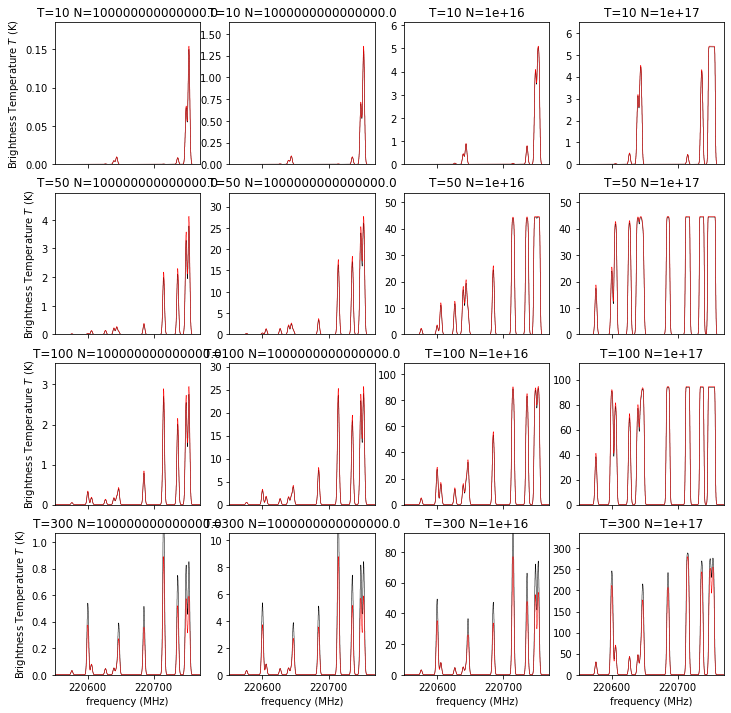

In [111]:
pl.figure(figsize=(12,12))
ii = 1
for tem in temperatures:
    for col in columns:
        ax = pl.subplot(4,4,ii)
        #temcol_results[tem][col]['xclass']['sp'].xarr.convert_to_unit(u.km/u.s, velocity_convention='radio', refX=115271.2018*u.MHz)
        #temcol_results[tem][col]['jpl'].xarr.convert_to_unit(u.km/u.s, velocity_convention='radio', refX=115271.2018*u.MHz)
        temcol_results[tem][col]['xclass']['sp'].plotter(axis=ax)
        temcol_results[tem][col]['jpl'].plotter(axis=ax, clear=False, color='r')
        ax.set_title(f"T={tem} N={col}")
        if ii <= 12:
            ax.set_xlabel('')
            ax.set_xticklabels([])
        #else:
        #    ax.set_xlabel("$V_{LSR}$ [km s$^{-1}$]")
        if ii % 4 == 1:
            ylim = ax.get_ylim()
        if ii % 4 != 1:
            ax.set_ylabel('')
        ii += 1
        ax.set_xlim(220550, 220770)
